In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [9]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


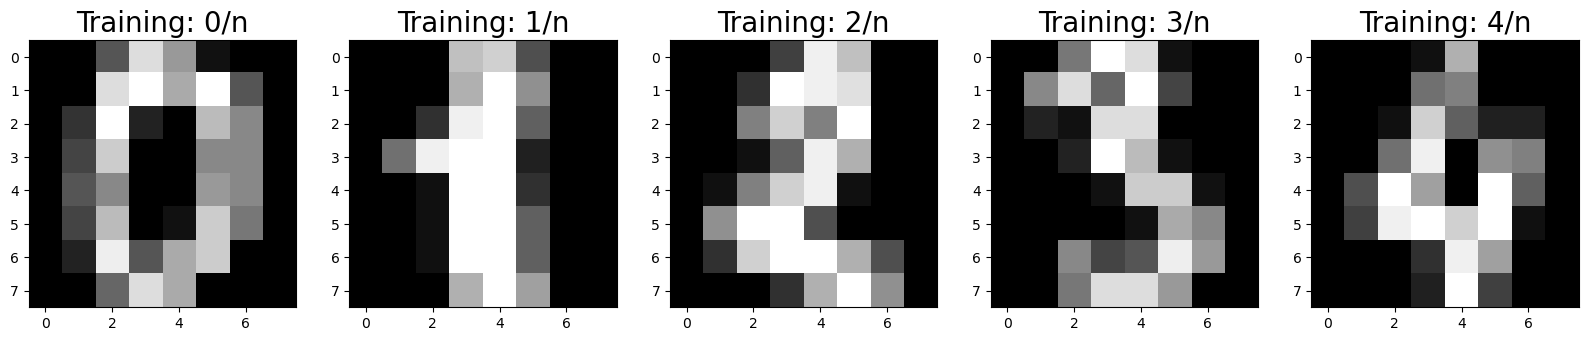

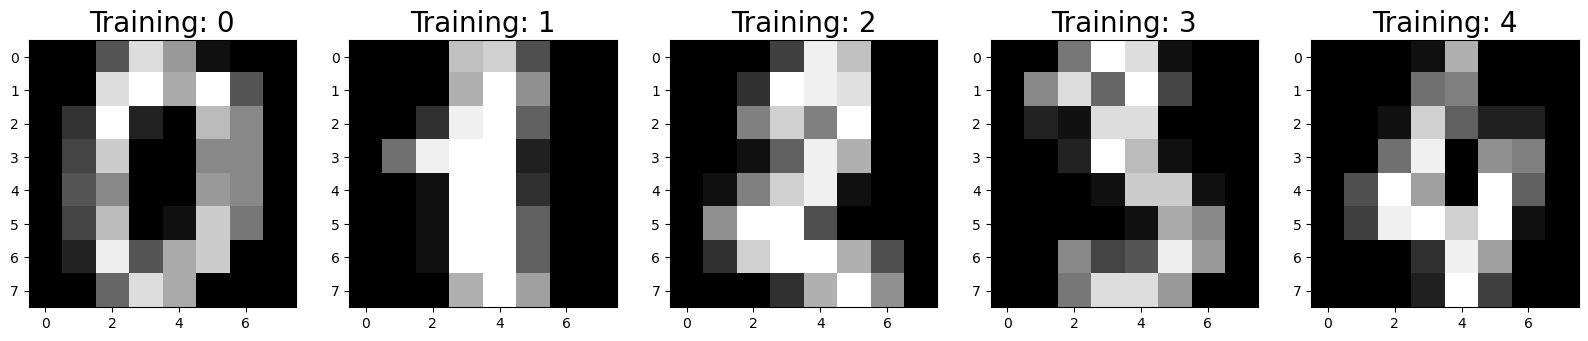

In [17]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i' % label, fontsize=20)
plt.show()


In [19]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)


In [21]:
x_train.shape

(1383, 64)

In [23]:
y_train.shape

(1383,)

In [33]:
from sklearn.linear_model import LogisticRegression

In [43]:
LogReg = LogisticRegression(max_iter=1000)

In [45]:
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [47]:
LogReg.predict(x_test[0].reshape(1,-1))

array([4])

In [49]:
LogReg.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [53]:
predictions = LogReg.predict(x_test)

In [59]:
score = LogReg.score(x_test,y_test)
print(score)

0.9492753623188406


In [61]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


In [75]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test): 
    if predict==actual:
        classifiedIndex.append(index)
    index +=1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}. Actual: {}" .format(predictions[wrong],y_test[wrong]), fontsize=20)

<Figure size 2000x300 with 0 Axes>

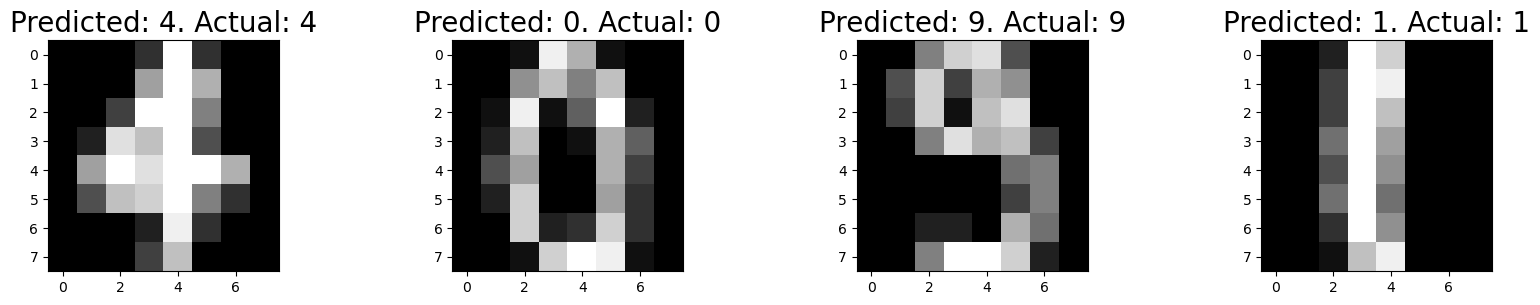

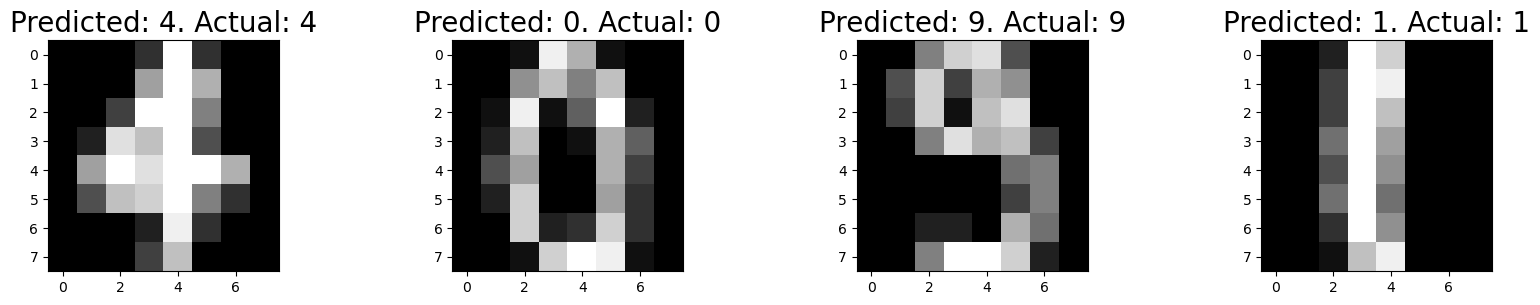

In [77]:
plt.show()